In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
page_request = requests.get(url)
soup_elements= BeautifulSoup(page_request.text, 'html')

In [4]:
print(soup_elements)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

In [5]:
soup_elements.find_all('table')

[<table class="table">
 <thead>
 <tr>
 <th style="text-align: left;">Party</th>
 <th style="text-align:right">Won</th>
 <th style="text-align:right">Leading</th>
 <th style="text-align:right">Total</th>
 </tr>
 </thead>
 <tbody>
 <tr class="tr">
 <td style="text-align:left">Bharatiya Janata Party - BJP</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-369.htm">240</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                                                     </td>
 <td style="text-align:right">240</td>
 </tr>
 <tr class="tr">
 <td style="text-align:left">Indian National Congress - INC</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-742.htm">99</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                   

In [6]:
soup_elements.find_all('table', class_ = 'table')

[<table class="table">
 <thead>
 <tr>
 <th style="text-align: left;">Party</th>
 <th style="text-align:right">Won</th>
 <th style="text-align:right">Leading</th>
 <th style="text-align:right">Total</th>
 </tr>
 </thead>
 <tbody>
 <tr class="tr">
 <td style="text-align:left">Bharatiya Janata Party - BJP</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-369.htm">240</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                                                     </td>
 <td style="text-align:right">240</td>
 </tr>
 <tr class="tr">
 <td style="text-align:left">Indian National Congress - INC</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-742.htm">99</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                   

In [7]:
election_table = soup_elements.find_all('table')
election_table 

[<table class="table">
 <thead>
 <tr>
 <th style="text-align: left;">Party</th>
 <th style="text-align:right">Won</th>
 <th style="text-align:right">Leading</th>
 <th style="text-align:right">Total</th>
 </tr>
 </thead>
 <tbody>
 <tr class="tr">
 <td style="text-align:left">Bharatiya Janata Party - BJP</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-369.htm">240</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                                                     </td>
 <td style="text-align:right">240</td>
 </tr>
 <tr class="tr">
 <td style="text-align:left">Indian National Congress - INC</td>
 <td style="text-align:right">
 <a href="partywisewinresultState-742.htm">99</a>
 </td>
 <td style="text-align:right">
                                                                                         0
                                                   

In [8]:
for element in election_table:
    headers = element.find_all('th')

In [9]:
# Assuming headers is a list or a similar iterable
header_0 = headers[0]
header_1 = headers[1]
header_2 = headers[2]
header_3 = headers[3]

# Or, you can access them in one go using a tuple of indices
selected_headers_from_tabel = [headers[i] for i in [0, 1, 2, 3]]

# Print or use selected headers as needed
print(selected_headers_from_tabel)

[<th style="text-align: left;">Party</th>, <th style="text-align:right">Won</th>, <th style="text-align:right">Leading</th>, <th style="text-align:right">Total</th>]


In [10]:
attributes = [title.text.strip() for title in selected_headers_from_tabel]

print(attributes)

['Party', 'Won', 'Leading', 'Total']


In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(columns = attributes)
df

,Party,Won,Leading,Total


In [13]:
for element in election_table:
    column_data = element.find_all('tr')

In [14]:
for row in column_data[1:-1]:  # Exclude the last row
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data

In [15]:
df

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [16]:
df.to_csv('lok_sabha_election_results.csv', index=False)

# title

In [17]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

In [19]:
df = pd.read_csv('lok_sabha_election_results.csv')

### 1. Party Dominance Analysis

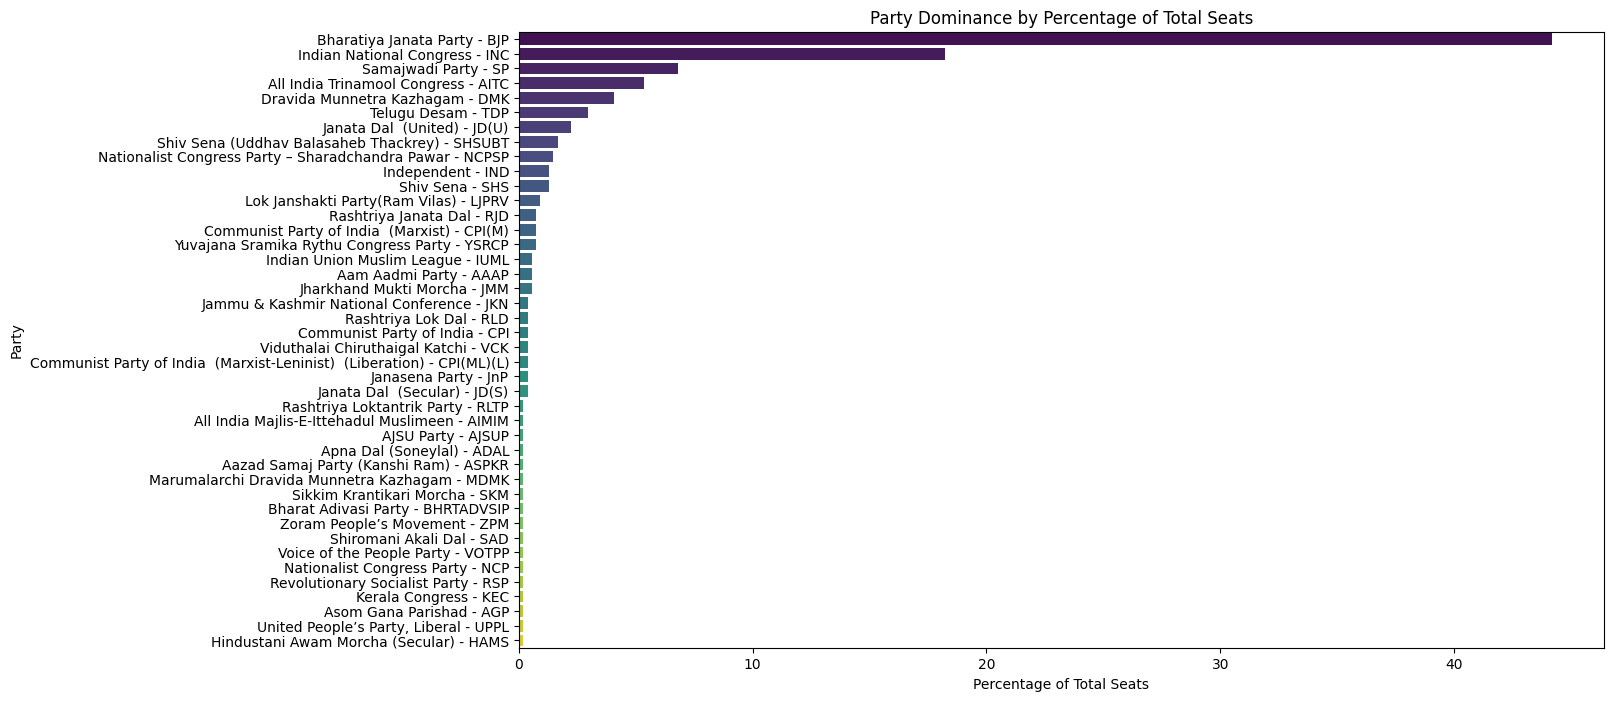

In [20]:
df['Percentage'] = (df['Total'] / df['Total'].sum()) * 100
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage', y='Party', data=df.sort_values('Percentage', ascending=False), palette='viridis')
plt.title('Party Dominance by Percentage of Total Seats')
plt.xlabel('Percentage of Total Seats')
plt.ylabel('Party')
plt.show()

### 2. Regional Party Strength

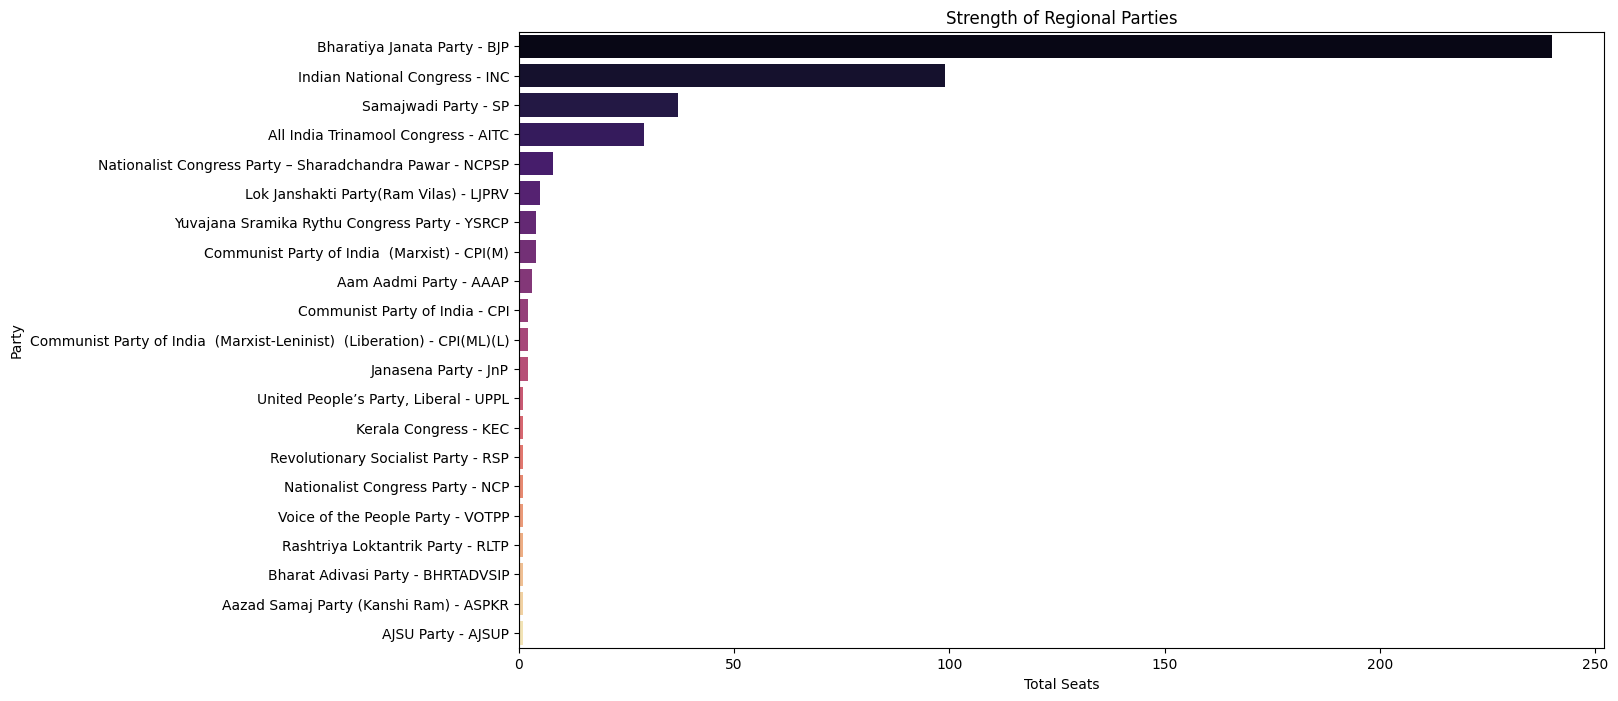

In [21]:
regional_parties = df[df['Party'].str.contains('Party') | df['Party'].str.contains('Congress')]
plt.figure(figsize=(14, 8))
sns.barplot(x='Total', y='Party', data=regional_parties.sort_values('Total', ascending=False), palette='magma')
plt.title('Strength of Regional Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

### 3. Seats Distribution Skewness

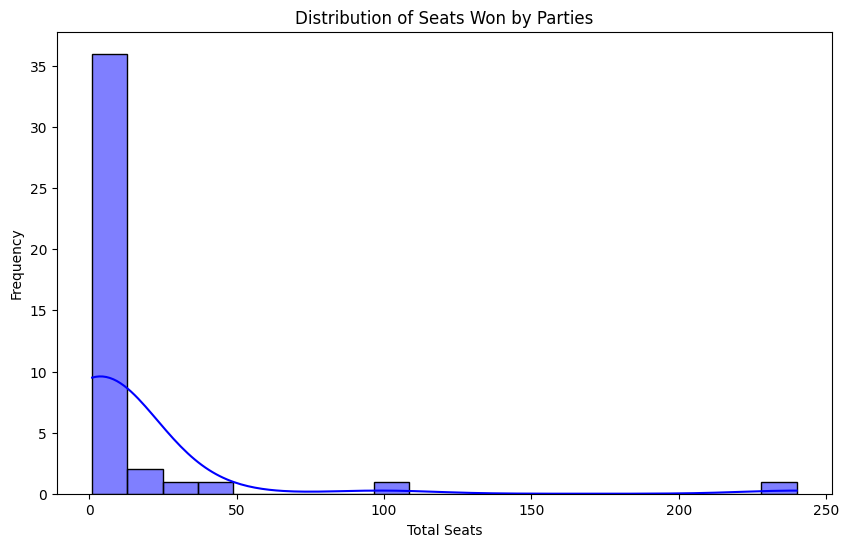

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=True, bins=20, color='blue')
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Total Seats')
plt.ylabel('Frequency')
plt.show()

### 4. Party Fragmentation

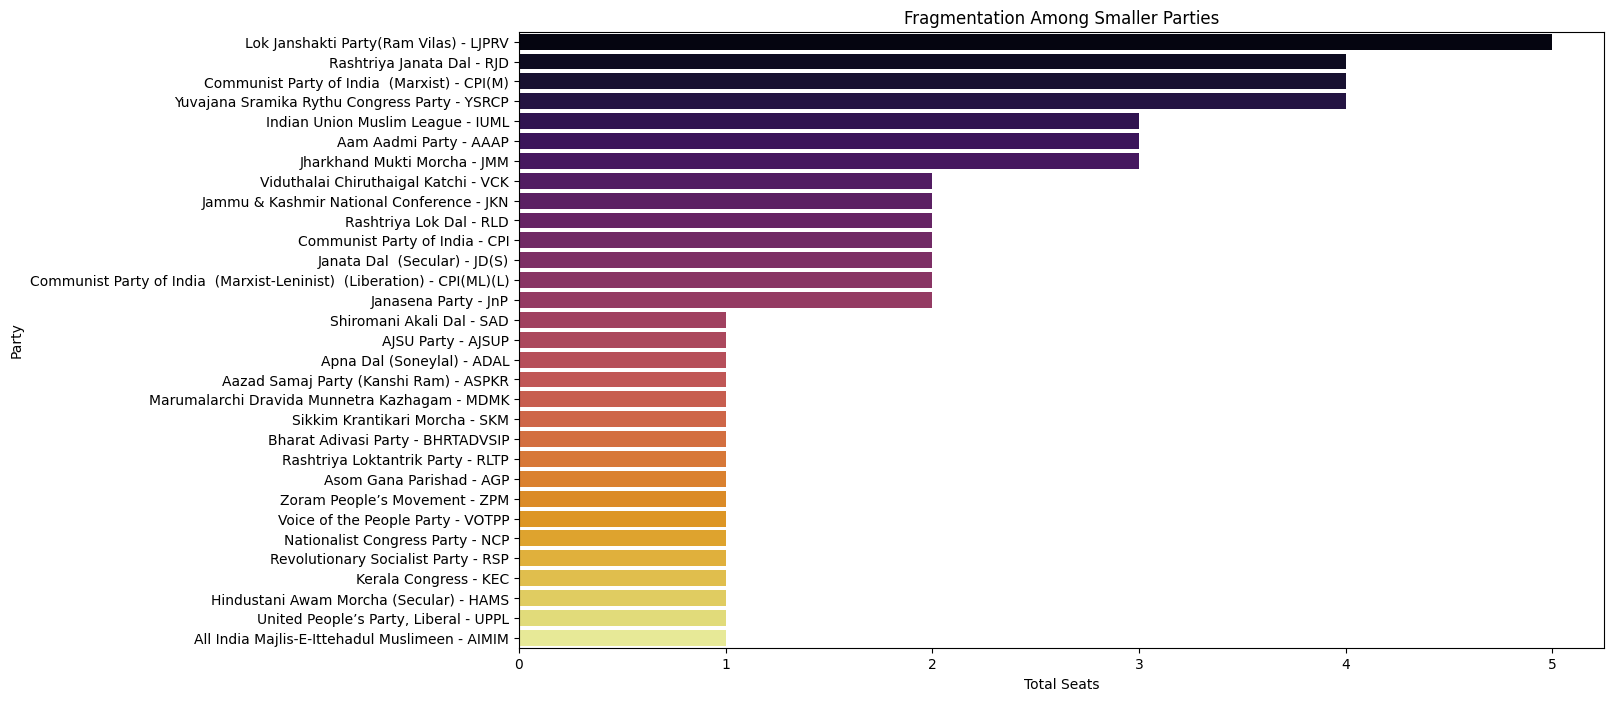

In [23]:
small_parties = df[df['Total'] <= 5]
plt.figure(figsize=(14, 8))
sns.barplot(x='Total', y='Party', data=small_parties.sort_values('Total', ascending=False), palette='inferno')
plt.title('Fragmentation Among Smaller Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

### 5. Party Seat Distribution

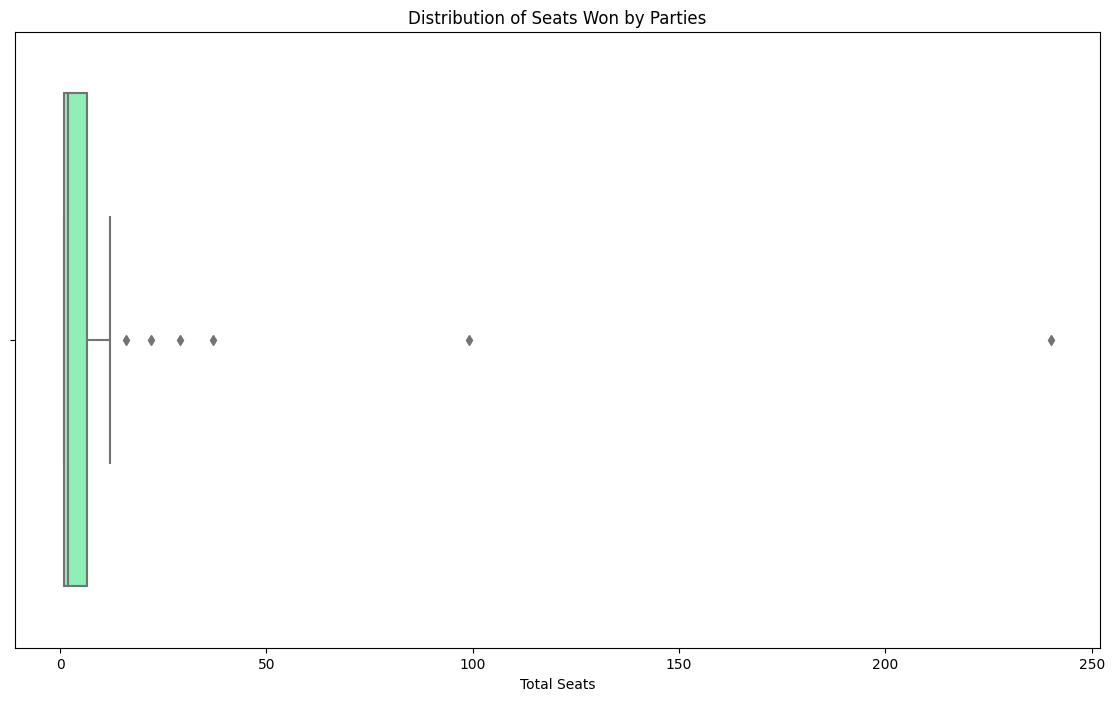

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Total', data=df, palette='rainbow')
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Total Seats')
plt.show()

### 6. Scatter Plot of Seats Won and Leading for Each Party

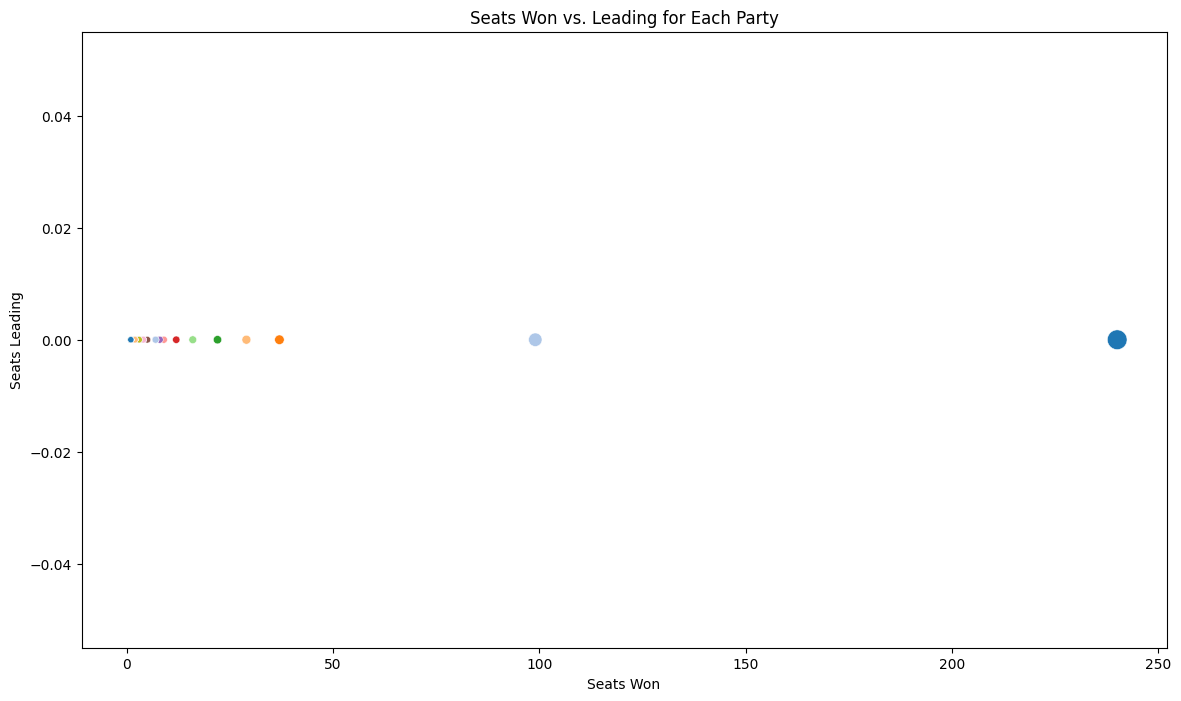

In [25]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Won', y='Leading', hue='Party', size='Total', data=df, palette='tab20', legend=False, sizes=(20, 200))
plt.title('Seats Won vs. Leading for Each Party')
plt.xlabel('Seats Won')
plt.ylabel('Seats Leading')
plt.show()

### 7. Strip Plot of Seats Won by Party

C:\Users\MARUTHI\AppData\Local\Temp\ipykernel_21628\259283482.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Total', y='Party', data=df, jitter=True, palette='deep', size=10)


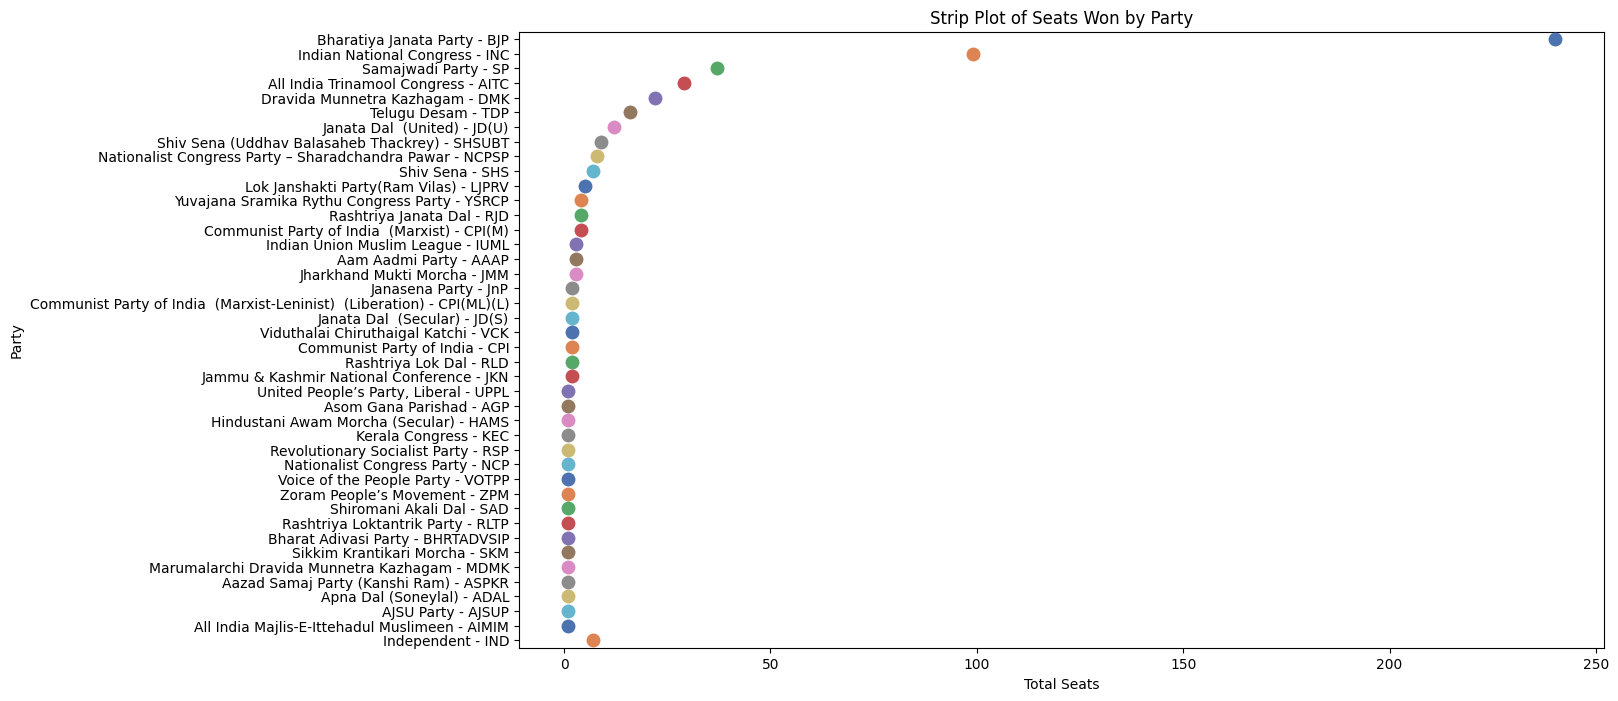

In [26]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Total', y='Party', data=df, jitter=True, palette='deep', size=10)
plt.title('Strip Plot of Seats Won by Party')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

### 8. Pairplot for All Numeric Variables

c:\Users\MARUTHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MARUTHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MARUTHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MARUTHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\MARUTHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

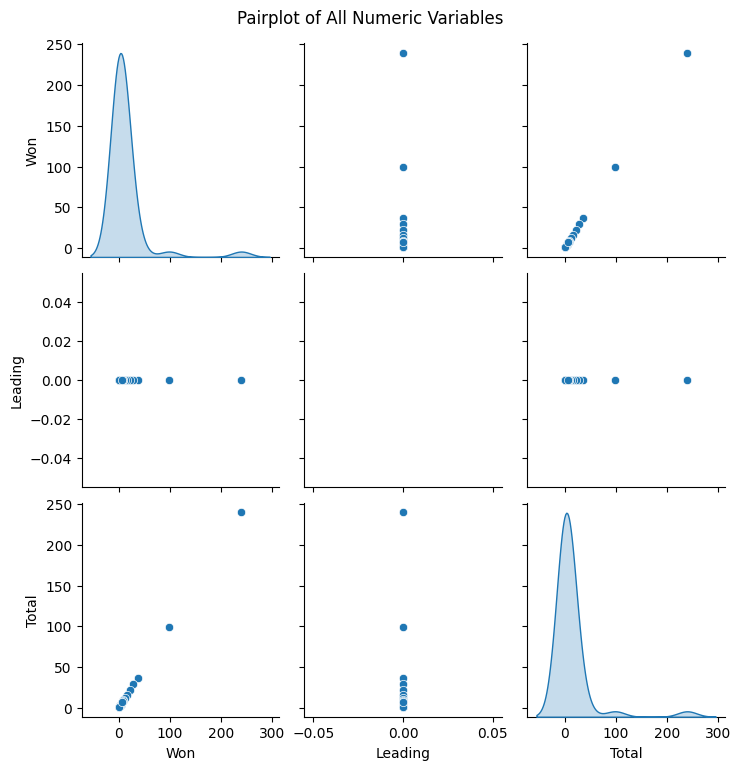

In [27]:
sns.pairplot(df[['Won', 'Leading', 'Total']], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()

### 9. Heatmap of Correlation Between Numerical Variables

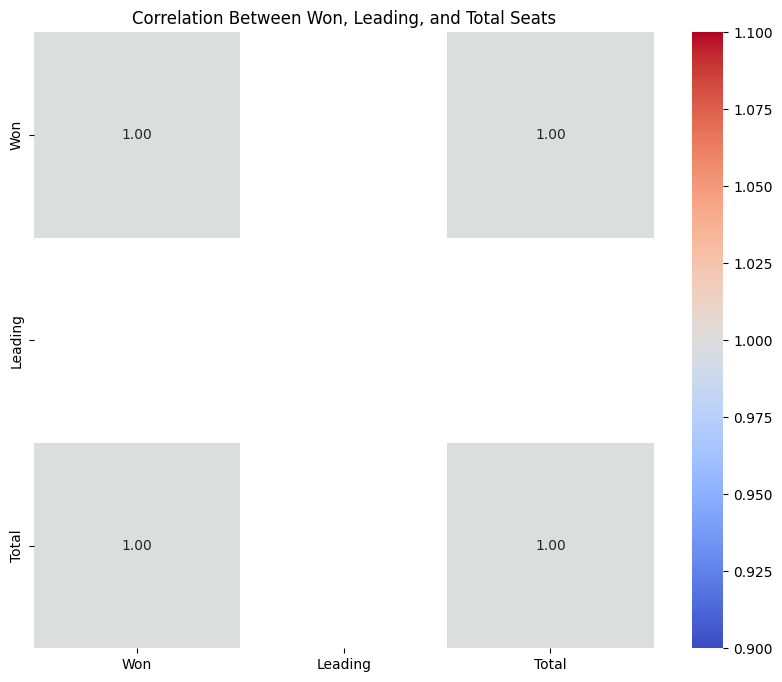

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Won', 'Leading', 'Total']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Won, Leading, and Total Seats')
plt.show()

### 10. Swarm Plot of Seats Distribution

C:\Users\MARUTHI\AppData\Local\Temp\ipykernel_21628\2581033053.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Total', y='Party', data=df, palette='Set2', size=10)


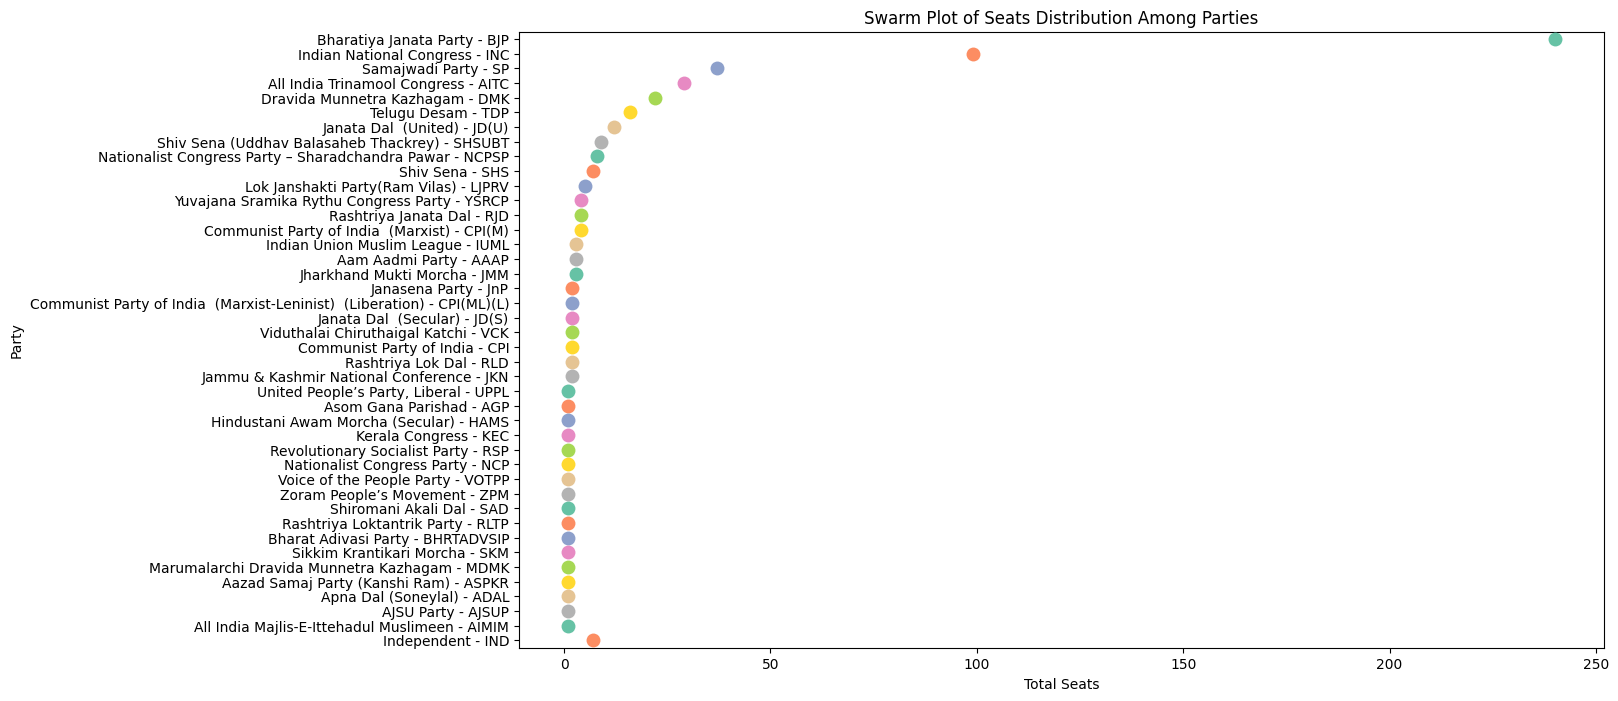

In [29]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Total', y='Party', data=df, palette='Set2', size=10)
plt.title('Swarm Plot of Seats Distribution Among Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

In [30]:
df

,Party,Won,Leading,Total,Percentage
0,Bharatiya Janata Party - BJP,240,0,240,44.198895
1,Indian National Congress - INC,99,0,99,18.232044
2,Samajwadi Party - SP,37,0,37,6.813996
3,All India Trinamool Congress - AITC,29,0,29,5.340700
4,Dravida Munnetra Kazhagam - DMK,22,0,22,4.051565
5,Telugu Desam - TDP,16,0,16,2.946593
6,Janata Dal (United) - JD(U),12,0,12,2.209945
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9,1.657459
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8,1.473297
9,Shiv Sena - SHS,7,0,7,1.289134


In [31]:
df.drop(columns=['Leading', 'Total'], inplace=True)

In [32]:
df

,Party,Won,Percentage
0,Bharatiya Janata Party - BJP,240,44.198895
1,Indian National Congress - INC,99,18.232044
2,Samajwadi Party - SP,37,6.813996
3,All India Trinamool Congress - AITC,29,5.340700
4,Dravida Munnetra Kazhagam - DMK,22,4.051565
5,Telugu Desam - TDP,16,2.946593
6,Janata Dal (United) - JD(U),12,2.209945
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,1.657459
8,Nationalist Congress Party – Sharadchandra Paw...,8,1.473297
9,Shiv Sena - SHS,7,1.289134


In [33]:
df.to_csv('lok_sabha_election_results_modified.csv', index=False)